In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Korisnik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Problem Statement:
Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.

Customize the plot by setting the number of bins to 40 and the bar color to blue.

Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

Hint:
Use the DataFrames plot() method and set the bins parameter to 40 and the color parameter to 'blue'.

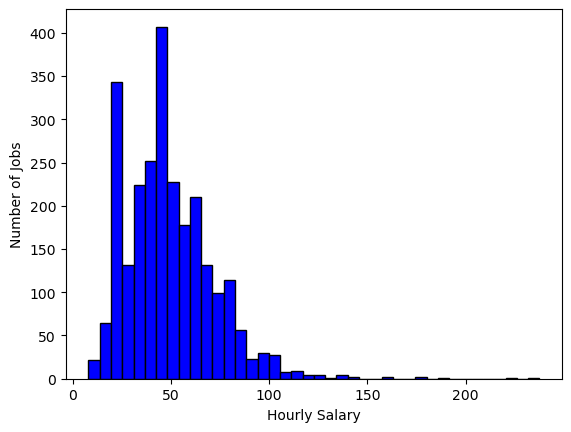

In [2]:
df_DS = df[df['job_title_short'] == 'Data Scientist']

hourly_salaries = df_DS['salary_hour_avg'].dropna()

plt.hist(hourly_salaries, bins=40, color='blue', edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()


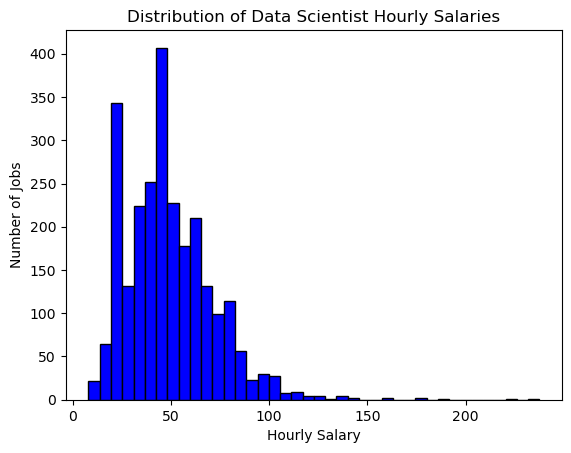

In [3]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

# Plot the histogram
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

Problem Statement:
Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.

Customize the plot by setting the number of bins to 55, the bar color to 'magenta'

Add a title 'Distribution of Job Postings by Number of Skills Listed'.

Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

Hint:
Use the DataFrames plot() method and set the bins parameter to 55, the color parameter to 'magenta', and edgecolor to 'black'.

In [5]:
df_skills = df.dropna(subset='job_skills').copy()
# df_skills['num_skills'] = df_skills['job_skills'].apply(len)1
df_skills['num_skills'] = [len(skills) for skills in df_skills['job_skills']]
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,num_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",6
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",9
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",8
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",9
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",8
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi...",4
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}",2
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",17


Text(0, 0.5, 'Number of Job Postings')

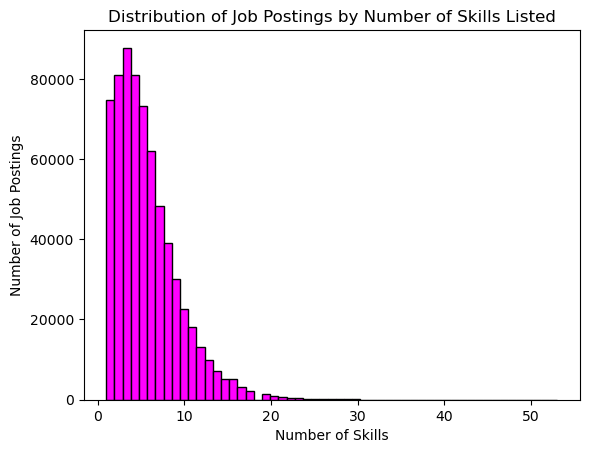

In [ ]:
plt.hist(df_skills['num_skills'], bins=55, color='magenta', edgecolor='black')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')

Problem Statement:
Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.

Customize the plot by setting the number of bins to 50, the bar color to red

Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
- color: 'blue'/'green'
- linestyle: 'dashed'
- label: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

Hint:
Use the DataFrames plot() method and set the bins parameter to 50 and the color parameter to 'red'. Use plt.axvline() to add annotations for the mean and median salaries.

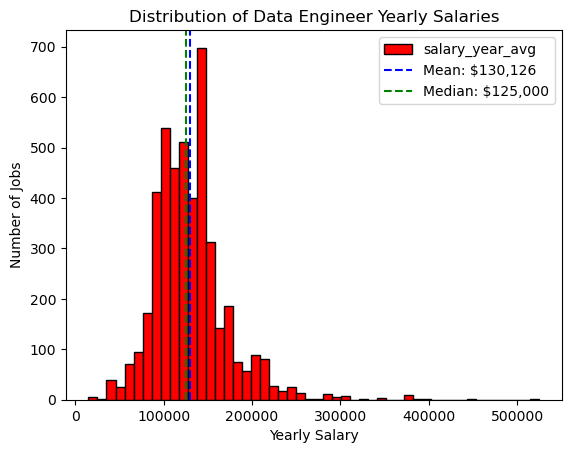

In [22]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset='salary_year_avg')
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# kod plt.hist() mora legenda da se definise preko label argumenta
plt.hist(df_DE['salary_year_avg'], bins=50, color='red', edgecolor='black', label='salary_year_avg')
plt.axvline(mean_salary, color='blue', label=f'Mean: ${mean_salary:,.0f}', linestyle='dashed')
plt.axvline(median_salary, color='green', label=f'Median: ${median_salary:,.0f}', linestyle='dashed')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()


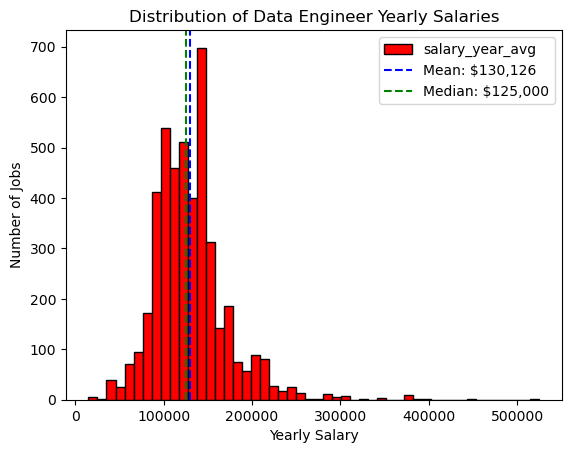

In [ ]:
# Get mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# Plot the histogram
# kada se radi df.plot(kind='hist') ovde ne treba da se definise label za legendu vec se sam automatski prikazuje
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()